In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Year21 = pd.read_csv('data_2021.csv')

In [3]:
Year21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min,Month
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,2021,0,0,1,Friday,0,1520.0,Night,25.0,January
1,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,2021,0,0,1,Friday,0,853.0,Night,14.0,January
2,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,2021,0,0,1,Friday,0,335.0,Night,6.0,January
3,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,2021,0,0,1,Friday,0,194.0,Night,3.0,January
4,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,2021,0,0,1,Friday,0,1042.0,Night,17.0,January


In [4]:
Year21.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
month                 0
year                  0
start_hour            0
end_hour              0
day                   0
day of week           0
date_is_weekend       0
trip_duration         0
time_of_day           0
trip_duration_min     0
Month                 0
dtype: int64

In [5]:
# Create a new column for the route 
Year21['route'] = Year21['start_station_name'] + ' to ' + Year21['end_station_name']

In [6]:
Year21.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min,Month,route
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,0,0,1,Friday,0,1520.0,Night,25.0,January,Maine Ave & 9th St SW to Rosslyn Metro / Wilso...
1,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,0,0,1,Friday,0,853.0,Night,14.0,January,17th & Corcoran St NW to 14th & Belmont St NW
2,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,0,0,1,Friday,0,335.0,Night,6.0,January,Wilson Blvd. & N. Vermont St. to Wilson Blvd. ...


In [7]:
# Count the occurrences of each route
route_counts = Year21['route'].value_counts()

In [8]:
# Find the most common routes
top_routes = route_counts.head(10) 

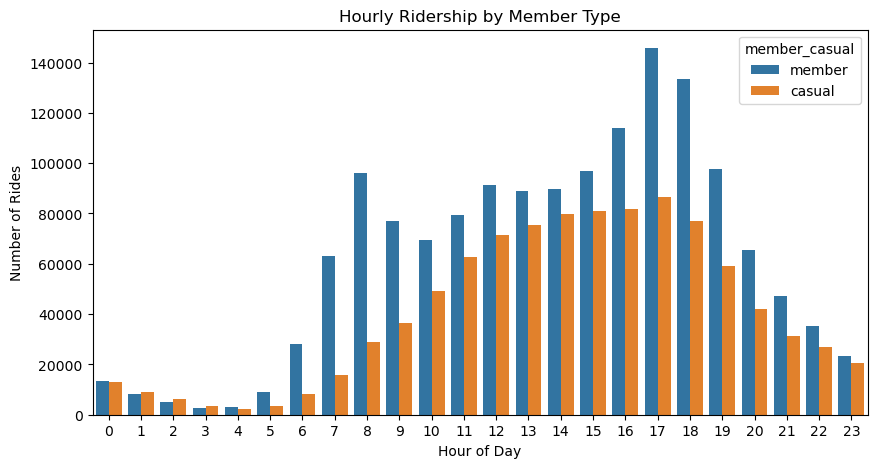

In [9]:
# Hourly ridership comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', hue='member_casual', data=Year21)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ridership by Member Type')
plt.show()

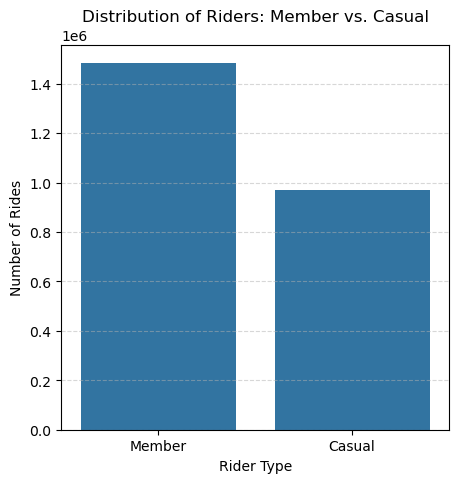

In [10]:
plt.figure(figsize=(5, 5)) 

# Create the countplot
sns.countplot(x='member_casual', data=Year21)

# Set title and labels
plt.title('Distribution of Riders: Member vs. Casual')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Member','Casual']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
# Trip duration vs. distance
# Assuming you have calculated distance in a separate step
plt.figure(figsize=(10, 5))
sns.barplot(x='rideable_type', y='trip_duration', hue='rideable_type', data=Year21)
plt.xlabel('Bike Type')
plt.ylabel('Trip Duration')
plt.title('Trip Duration vs. Distance')
plt.show()

In [13]:
print(type(Year21.index))  # Check the type of your DataFrame's index

<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# Calculate ride starts per station per hour
# station_hourly_starts = Year21.groupby(['start_station_id', pd.Grouper(key='started_at', freq='H')])['ride_id'].count().reset_index(name='start_count')


In [12]:
# Calculate ride ends per station per hour
station_hourly_ends = Year21.groupby(['end_station_id', pd.Grouper(key='ended_at', freq='H')])['ride_id'].count().reset_index(name='end_count')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'